#### 판다스 자료구조 

- Series = 딕셔너리 

- DataFrame = 표

In [2]:
import pandas as pd

#series : 인덱스를 이름이 붙은 값으로 지정해줌. 

a = pd.Series([1,2,3,4], index=['a','b','c','d'])
print(a)
print(a.index)

a    1
b    2
c    3
d    4
dtype: int64
Index(['a', 'b', 'c', 'd'], dtype='object')


## 데이터프레임

- 데이터를 쉽게 가공하기 위한 틀 

- DataFrame() 함수를 사용하여 딕셔너리형 자료를 판다스로 가공 가능 

In [3]:
data = {'name' : ['Mark','Jane','Chris','Ryan'],
       'age' : [33, 32, 44, 42],
       'score': [91.3, 83.4, 77.5, 87.7]}

df = pd.DataFrame(data)
print(df)

    name  age  score
0   Mark   33   91.3
1   Jane   32   83.4
2  Chris   44   77.5
3   Ryan   42   87.7


##### 데이터프레임 연산

In [4]:
df.sum() # 특정 값들의 합계를 구할 수 있음. 

name     MarkJaneChrisRyan
age                    151
score                339.9
dtype: object

In [5]:
df.mean() #평균구하기 : 숫자로 되어 있는 원소들만 구함. 

C:\Users\admin\AppData\Local\Temp\ipykernel_17464\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


age      37.750
score    84.975
dtype: float64

#### 데이터 선택 : 딕셔너리처럼 선택해서 추출 가능 

- 데이터프레임에서 키 값 지정해주면 그 값만 가져옴. 

- 인덱스처럼 쓰고 싶으면 키 값에 '' 따옴표 붙이면 됨.

In [6]:
df.age

0    33
1    32
2    44
3    42
Name: age, dtype: int64

In [9]:
df['age']

0    33
1    32
2    44
3    42
Name: age, dtype: int64

In [15]:
a = pd.DataFrame({'a':(1,2,3), 'b':1,'c':1})
print(a)
print(a.index)
print(a.columns)

a['b'] = [3,4,5]
print(a)

   a  b  c
0  1  1  1
1  2  1  1
2  3  1  1
RangeIndex(start=0, stop=3, step=1)
Index(['a', 'b', 'c'], dtype='object')
   a  b  c
0  1  3  1
1  2  4  1
2  3  5  1


#### csv파일 데이터프레임으로 만들기 : 아파트 실거래가 파일 실습 

In [16]:
df = pd.read_csv('apt.csv',encoding='cp949')
len(df)

42758

In [17]:
df.head() #csv파일에서 가장 첫번째 줄은 컬럼명이 된다. 

,지역,아파트,면적,가격,층
0,강원도 강릉시 견소동,송정한신,59.800,10900,5
1,강원도 강릉시 견소동,송정한신,116.175,18500,10
2,강원도 강릉시 견소동,송정해변신도브래뉴아파트,84.990,25000,6
3,강원도 강릉시 견소동,송정해변신도브래뉴아파트,84.990,20600,3
4,강원도 강릉시 견소동,송정해변신도브래뉴아파트,84.990,20500,1


In [18]:
df.tail()

,지역,아파트,면적,가격,층
42753,충청북도 충주시 호암동,호반현대,59.76,7000,3
42754,충청북도 충주시 호암동,호암리버빌(1단지),84.68,12000,15
42755,충청북도 충주시 호암동,호암리버빌(1단지),84.68,11000,7
42756,충청북도 충주시 호암동,호암리버빌(1단지),84.68,12000,14
42757,충청북도 충주시 호암동,호암리버빌(1단지),84.68,11200,11


In [22]:
df.지역.tail() # 원하는 값만 가져올 수 있음. 

42753    충청북도 충주시 호암동
42754    충청북도 충주시 호암동
42755    충청북도 충주시 호암동
42756    충청북도 충주시 호암동
42757    충청북도 충주시 호암동
Name: 지역, dtype: object

#### 조건별로 출력하기 

In [23]:
df[df.면적 > 130].head()

,지역,아파트,면적,가격,층
6,강원도 강릉시 교동,강릉교동롯데캐슬1단지,135.1727,34300,9
39,강원도 강릉시 남문동,삼익그린맨션,164.7540,21000,12
334,강원도 속초시 금호동,보람레이크더하임,156.7600,29500,1
433,강원도 원주시 개운동,원주힐스테이트,133.9912,26000,16
434,강원도 원주시 개운동,원주힐스테이트,137.4292,24000,14


In [28]:


#조건에 맞는 특정 컬럼 뽑기 
print(df.가격[(df.면적 > 130)])

#추가 합조건 "&"로 추가 가능 
print(df.가격[(df.면적 > 130) & (df.가격 < 15000)])

# 추가 곱조건은 | 로 가능 
print(df.가격[(df.면적 > 130) | (df.가격 < 15000)])

6        34300
39       21000
334      29500
433      26000
434      24000
         ...  
42595    15000
42607    18500
42663    31500
42736    18500
42737    16200
Name: 가격, Length: 1567, dtype: int64
862      14900
927      13800
16785    14700
36733    14700
37726    13700
38811    14600
39487    12000
40680    12500
41173    14000
41578    13000
Name: 가격, dtype: int64
0        10900
6        34300
35        4600
36       13200
37       14700
         ...  
42753     7000
42754    12000
42755    11000
42756    12000
42757    11200
Name: 가격, Length: 11499, dtype: int64


In [29]:
#원하는 자료만 살펴보기 : 정교하게 조건 추가 원할 때 loc사용
# df.loc[원하는 행의 조건, 원하는 열의 조건]

#ex. 아파트와 가격 10번까지만 보고 싶음. 

df.loc[:10,['아파트','가격']] #컬럼 이름을 리스트로 묶어줌. / 정말 많이 사용. 

,아파트,가격
0,송정한신,10900
1,송정한신,18500
2,송정해변신도브래뉴아파트,25000
3,송정해변신도브래뉴아파트,20600
4,송정해변신도브래뉴아파트,20500
5,강릉 교동 풍림아이원 아파트,29200
6,강릉교동롯데캐슬1단지,34300
7,강릉교동롯데캐슬2단지,32500
8,교동1주공,16200
9,교동1주공,21550


In [31]:
#필터링 : 4억원을 초과하는 데이터 중 아파트와 가격만 출력 

df.loc[:,['아파트','가격']][df.가격 > 40000] 

,아파트,가격
382,속초청호아이파크,45800
541,무실e-편한세상,44600
592,원주반곡아이파크,40700
842,온의 롯데캐슬 스카이클래스,44000
843,온의 롯데캐슬 스카이클래스,42900
...,...,...
42364,신영지웰시티 1차,47700
42365,신영지웰시티 1차,46000
42366,신영지웰시티 1차,55800
42367,신영지웰시티 1차,67000


In [33]:
df.iloc[55:59] # 인덱스 번호로 원하는 값만 가져올 수 있음. 슬라이싱도 가능.

,지역,아파트,면적,가격,층
55,강원도 강릉시 노암동,신화,84.9540,13700,1
56,강원도 강릉시 노암동,양우내안애,114.6085,24800,12
57,강원도 강릉시 노암동,양우내안애,114.6085,24800,7
58,강원도 강릉시 노암동,양우내안애,59.6927,16800,12


#### 새로운 값 추가하기

- 새로운 컬럼 이름 넣고 값을 넣으면 만들어짐. 

> df['새로운 컬럼 이름'] = 값

In [34]:
df['단가'] = df.가격 / df.면적 

df.loc[:10, ['가격','면적','단가']]

,가격,면적,단가
0,10900,59.8000,182.274247
1,18500,116.1750,159.242522
2,25000,84.9900,294.152253
3,20600,84.9900,242.381457
4,20500,84.9900,241.204848
5,29200,84.9964,343.543962
6,34300,135.1727,253.749463
7,32500,118.0686,275.263703
8,16200,59.8900,270.495909
9,21550,84.8400,254.007544


#### sort() 데이터 정렬 

In [40]:
#ascending 오름차순 

df.sort_values(by= '가격').loc[:10, ('지역','아파트','가격')]

,지역,아파트,가격
17024,경상북도 구미시 원평동,원평주공,600
17022,경상북도 구미시 원평동,원평주공,700
17637,경상북도 칠곡군 약목면 관호리,성재,750
17031,경상북도 구미시 원평동,원평주공,800
17027,경상북도 구미시 원평동,원평주공,800
...,...,...,...
36407,전라남도 광양시 광양읍 덕례리,수시아,21800
32991,울산광역시 북구 연암동,벽산늘푸른,21800
32554,울산광역시 남구 야음동,신정현대홈타운(2),21800
11173,경기도 의정부시 장암동,신곡우성,21800


In [41]:
#가격이 40000 초과인 데이터를 면적을 기준으로 정렬하고 거기서 가격,면적,지역만 추출

df[df.가격 > 40000].sort_values(by = '면적').loc[:, ('가격','면적','지역')]

,가격,면적,지역
30111,90000,25.3284,서울특별시 성동구 성수동1가
27124,74000,28.2460,서울특별시 강남구 역삼동
27122,74500,28.2460,서울특별시 강남구 역삼동
27123,76000,28.2460,서울특별시 강남구 역삼동
29725,43500,30.0100,서울특별시 마포구 아현동
...,...,...,...
27118,245000,242.8200,서울특별시 강남구 역삼동
30002,206000,244.4200,서울특별시 서초구 서초동
10106,100000,244.6630,경기도 용인수지구 성복동
31501,240000,273.8200,서울특별시 중구 신당동


#### 특정한 문자를 포함하는 열 추출

- find : 해당 문자열의 인덱스 번호를 리턴해줌.

In [42]:
#강릉이 들어간 데이터가 있는 열의 인덱스 출력 
# 찾는 문자열이 없으면 '-1' 반환할 것 

df.지역.str.find('강릉')

0        4
1        4
2        4
3        4
4        4
        ..
42753   -1
42754   -1
42755   -1
42756   -1
42757   -1
Name: 지역, Length: 42758, dtype: int64

In [43]:
#평균치 구하기 

dfF = df[df.지역.str.find('강릉') > -1]

dfF.mean()

C:\Users\admin\AppData\Local\Temp\ipykernel_17464\1010281142.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dfF.mean()


면적       70.477802
가격    15414.574468
층         7.420213
단가      209.942161
dtype: float64

In [44]:
df2 = pd.read_csv("survey.csv")
df2.head()

,sex,income,English,jobSatisfaction,stress
0,m,3000,500,5,5
1,f,4000,600,4,4
2,f,5000,700,3,2
3,m,6000,800,2,2
4,m,4000,700,2,5


#### 통계데이터 다루기 

- mean : 평균


In [45]:
df2.mean()

C:\Users\admin\AppData\Local\Temp\ipykernel_17464\3587575296.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2.mean()


income             4304.217391
English             608.695652
jobSatisfaction       3.304348
stress                3.347826
dtype: float64

In [46]:
# 특정 컬럼만 보고싶다. 
df2.income.sum()

98997

In [48]:
#기초 통계량 요약해서 출력 값의 중앙값, 통계량 확인. 

df2.describe()

,income,English,jobSatisfaction,stress
count,23.000000,23.000000,23.000000,23.000000
mean,4304.217391,608.695652,3.304348,3.347826
std,1019.478341,99.603959,1.258960,1.433644
min,3000.000000,500.000000,1.000000,1.000000
25%,3000.000000,500.000000,2.500000,2.000000
50%,4999.000000,600.000000,3.000000,4.000000
75%,5000.000000,700.000000,4.000000,5.000000
max,6000.000000,800.000000,5.000000,5.000000


value_count : 몇번 나오는지 확인 

df.gtoupby : 특정 컬럼에 대해 같은 값을 가진 원소끼리 그룹으로 묶음

In [51]:
#남성 여성 나누어서 평균 구하기

df2.groupby(df2.sex).mean()

,income,English,jobSatisfaction,stress
sex,,,,
f,4333.111111,633.333333,3.666667,3.111111
m,4285.642857,592.857143,3.071429,3.500000


## 싸이파이 모듈 

In [55]:
# t검정 실행 


from scipy import stats

male = df2.income[df2.sex == 'm']
female = df2.income[df2.sex == 'f']

ttest_result = stats.ttest_ind(male,female)

#pvalue = 유의확률 / 유의확률이 작을 수록 유의한 차이가 있다.
# 0.01~0.05 사이인 경우 유의한 차이가 있다. 
# 유의하다 -> 내 연구결과가 틀릴 결과가 틀릴 가능성 

if ttest_result[1] > 0.05:
    print('p-value는 %f로 95퍼센트 수준에서 유의하지 않음.' %ttest_result[1])
else:
    print('p-value는 %f로 95퍼센트 수준에서 유의함.' %ttest_result[1])

p-value는 0.916194로 95퍼센트 수준에서 유의하지 않음.


#### 실전 통계 : 피어슨과 스피어만 상관관계 분석 알아보기 

- 판다스의 corr() 함수 통해 상관관계 분석가능 

- 특정 데이터만 보고 싶을 때 : 변수명.income.corr(변수명.원하는값)

In [57]:
corr = df2.corr()
corr

,income,English,jobSatisfaction,stress
income,1.000000,0.599452,-0.040108,-0.137920
English,0.599452,1.000000,-0.312051,0.073351
jobSatisfaction,-0.040108,-0.312051,1.000000,0.165338
stress,-0.137920,0.073351,0.165338,1.000000


In [58]:
corr.to_csv('corr.csv')

#### 회귀분석 알아보기

- Statsmodels 패키지 임포트

- formula 사용

- ols()함수 통해서 회귀분석 진행 

: ols(formula = '종속 변수(결과) ~ 독립 변수(원인)', data = 데이터프레임)

In [61]:
#회귀분석 가능 패키지

import statsmodels.formula.api as smf

model = smf.ols(formula = 'jobSatisfaction ~ English', data = df2)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:        jobSatisfaction   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     2.266
Date:                Thu, 03 Nov 2022   Prob (F-statistic):              0.147
Time:                        16:40:27   Log-Likelihood:                -36.243
No. Observations:                  23   AIC:                             76.49
Df Residuals:                      21   BIC:                             78.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7052      1.615      3.532      0.0

#### 다중 회귀 분석 

smf.ols(formula = '종속 변수 ~ 독립변수 1 + ... + 독립변수n', data = 데이터프레임)



In [62]:

model = smf.ols(formula = 'jobSatisfaction ~ English + stress + income', data = df2)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:        jobSatisfaction   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     1.458
Date:                Thu, 03 Nov 2022   Prob (F-statistic):              0.258
Time:                        16:59:39   Log-Likelihood:                -35.038
No. Observations:                  23   AIC:                             78.08
Df Residuals:                      19   BIC:                             82.62
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.9159      1.712      2.871      0.0

## 맷플롯립으로 그래프 그리기 

- pyplot 모듈 임포트 해서 사용하기 

> 위의 회귀분석 내용을 쉽게 볼 수 있도록 시각화 할 때 사용 

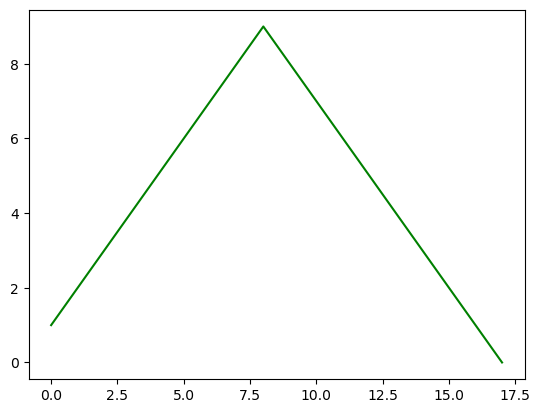

In [66]:
import matplotlib.pyplot as plt

x = [1,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,1,0]
plt.plot(x, color = 'g')
plt.show()

#그래프 모양과 색 지정하기 : plt.plot(그래프 자료, 모양 + 색)

#### 그래프 만들기


In [67]:
import numpy as np

t = np.arange(0,12,0.01)
print(t)

y = np.sin(t)
print(y)

[0.000e+00 1.000e-02 2.000e-02 ... 1.197e+01 1.198e+01 1.199e+01]
[ 0.          0.00999983  0.01999867 ... -0.5616433  -0.55334156
 -0.54498449]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


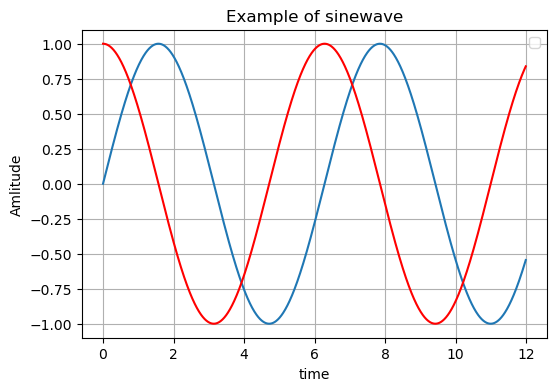

In [73]:
plt.figure(figsize=(6,4))
plt.plot(t, y)
plt.plot(t, np.cos(t), color='r')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amlitude')
plt.title('Example of sinewave')
plt.show()

[]

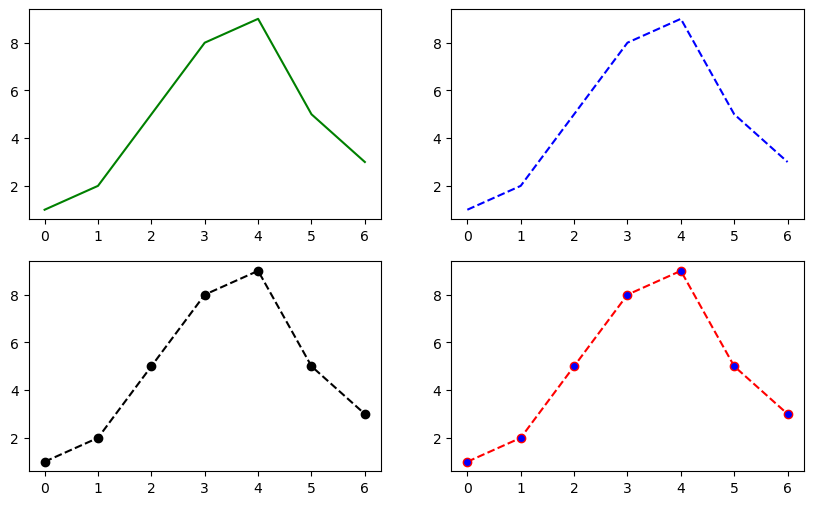

In [75]:
# 그래프 네개 동시 뽑기 

t = [0,1,2,3,4,5,6]
y = [1,2,5,8,9,5,3]

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(2,2,1) #그래프 추가
ax1.plot(t,y,color='g')
ax2 = fig.add_subplot(2,2,2)
ax2.plot(t,y,color='b', linestyle='--')
ax3 = fig.add_subplot(2,2,3)
ax3.plot(t,y,color='k',linestyle='--', marker='o')
ax4 = fig.add_subplot(2,2,4)
ax4.plot(t,y,color='r',linestyle='--', marker='o', markerfacecolor='b')

plt.plot()

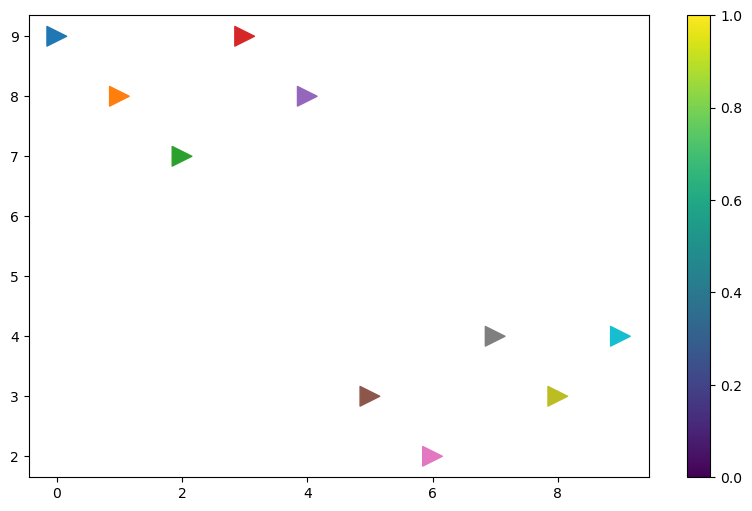

In [81]:
x = np.arange(0,10)
#print(x)
y = np.array([9,8,7,9,8,3,2,4,3,4])

c = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.figure(figsize=(10,6))
plt.scatter(x, y, s = 200, c = c,  marker='>') # s = 마커 사이즈
plt.colorbar()
plt.show()

In [84]:
s1= np.random.normal(loc=0, scale=1, size = 1000)
s2= np.random.normal(loc=5, scale=0.5, size = 1000)
s3= np.random.normal(loc=10, scale=2, size = 1000)

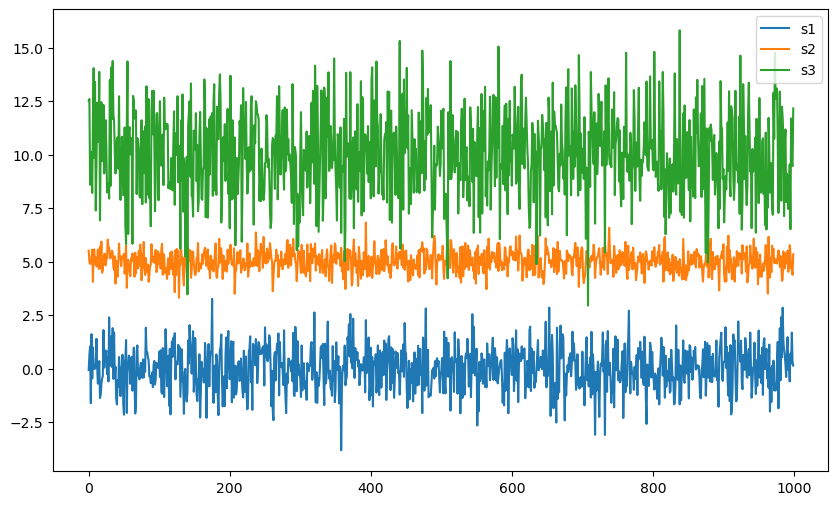

In [85]:
plt.figure(figsize=(10,6))

plt.plot(s1, label ='s1')
plt.plot(s2, label ='s2')
plt.plot(s3, label ='s3')
plt.legend()
plt.show()

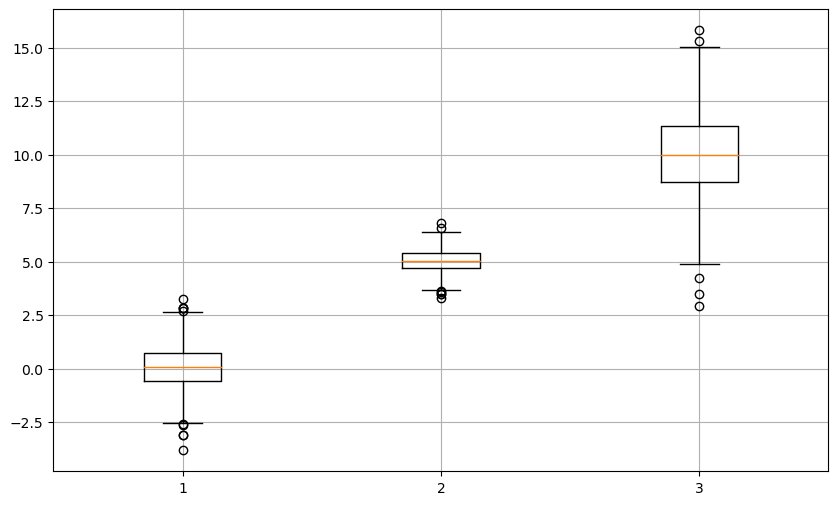

In [86]:
plt.figure(figsize=(10,6))
plt.boxplot((s1,s2,s3))
plt.grid()
plt.show()